### Library Importing

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import matplotlib
import squarify

### Loading Data

In [5]:
df = pd.read_csv('Music Sales.csv', index_col=None)

## 1.Bar Chart

Text(1000,3.5,'Top Selling Genre: Rock\nQuantity Sold: 1,284')

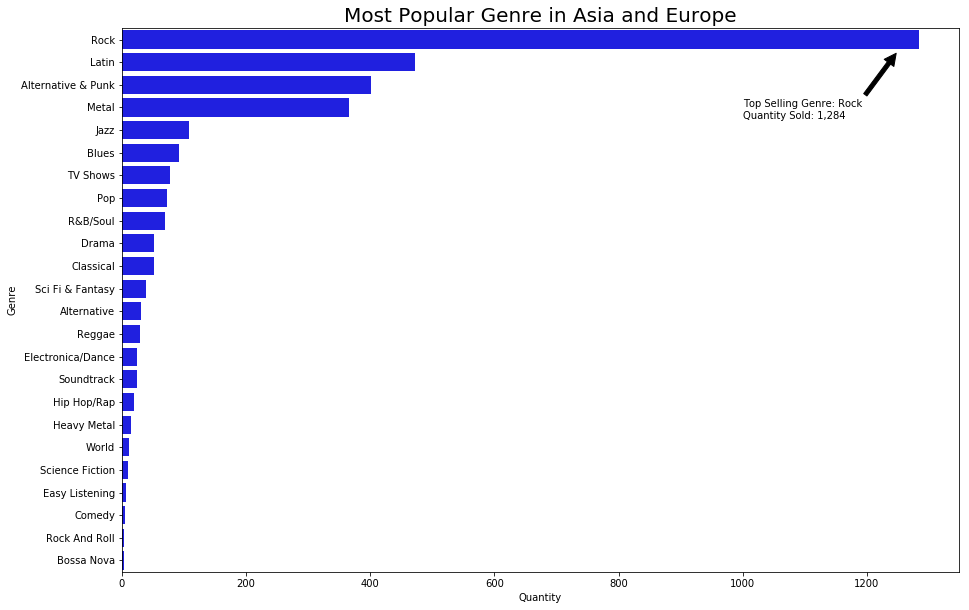

In [7]:
# Most Popular Genre in Asia & Europe
df_EA=df[df['Region'].isin(['Europe', 'Asia'])].copy()
df_genre = df_EA.groupby(['Genre'])['Quantity'].sum().reset_index()
df_genre.sort_values(by=['Quantity'], ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(15,10))
ax = fig.gca()
sns.barplot(y='Genre', x='Quantity', data=df_genre, color = "Blue", ax=ax)
ax.set_title('Most Popular Genre in Asia and Europe', size=20)
ax.annotate('Top Selling Genre: Rock\nQuantity Sold: 1,284', 
            xy = (1250,0.5), xytext=(1000,3.5), arrowprops=dict(facecolor='black', shrink=0.05))

Text(0.5,0,'Quantity')

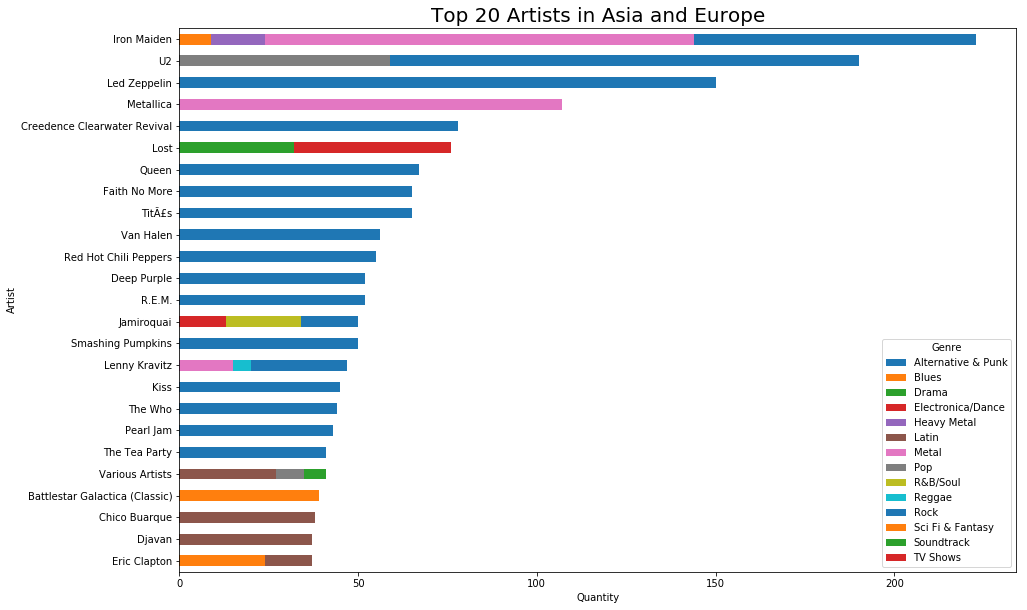

In [9]:
# Top 20 Artists in Europe and Asia.
# get the rank of artists by quantity
df_rank = df_EA.groupby(['Artist'])['Quantity'].sum().reset_index()
df_rank['Rank'] = df_rank['Quantity'].rank(method='dense', ascending=False)
# get the quantity by artists and genre
# append the rank of artists
df_rank_genre = df_EA.groupby(['Artist', 'Genre'])['Quantity'].sum().reset_index()
df_rank_genre=pd.merge(df_rank_genre, df_rank[['Artist', 'Rank']], on='Artist', how='left')
df_rank_genre.sort_values(by='Rank', inplace=True)
# reformat for plotting
df_top20 = df_rank_genre.loc[df_rank_genre['Rank'] <= 20,
                             ['Artist', 'Genre', 'Quantity']].pivot(columns='Genre',
                                                                    index='Artist',
                                                                    values='Quantity')

df_top20['total'] = df_top20.sum(axis=1)
df_top20.sort_values(by=['total', 'Artist'], ascending=[True, False], inplace=True)
df_top20.drop('total', axis=1, inplace=True)
ax = df_top20.plot.barh(stacked=True, figsize=(15, 10))

plt.title('Top 20 Artists in Asia and Europe', size=20)
plt.xlabel('Quantity')

## 2.Scatter Plot

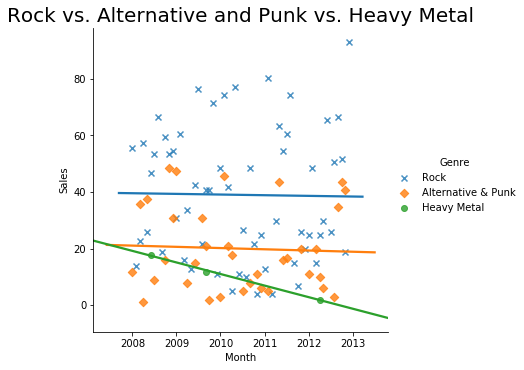

In [13]:
#Rock vs. Alternative and Punk vs. Heavy Metal.
# format date to month
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate_year_month'] = pd.to_datetime(df['InvoiceDate']).dt.strftime("%Y-%m")
# subset the data needed for the plot
df_3genres=df[df['Genre'].isin(['Alternative & Punk','Heavy Metal', 'Rock'])]
# get the summary
df_3genres_summary = df_3genres.groupby(['Genre', 'InvoiceDate_year_month'])['Sales'].sum().reset_index()
# set the template
t = pd.date_range('2008-01-01', '2012-12-31', freq='MS')
order=list(np.arange(60))*3

df_3genres_template=pd.DataFrame(list(itertools.product(['Rock','Alternative & Punk','Heavy Metal'], t)), 
                                 columns=['Genre', 'InvoiceDate'])
df_3genres_template['order']=order
df_3genres_template['InvoiceDate_year_month'] = pd.to_datetime(df_3genres_template['InvoiceDate']).dt.strftime("%Y-%m")
# merge the summary with the template
df_3genres_summary = pd.merge(df_3genres_template, df_3genres_summary, 
                               on=['Genre', 'InvoiceDate_year_month'], how='left')
plt.rcParams['figure.figsize'] = (10, 10)
ax=sns.lmplot(x='order', y='Sales', hue='Genre', markers=["x", "D", "o"], data=df_3genres_summary, ci=None)
plt.title('Rock vs. Alternative and Punk vs. Heavy Metal', size=20)
plt.xlabel('Month')
ax.set(xticks=np.arange(0,71,12), xticklabels=[2008, 2009, 2010, 2011, 2012, 2013])

## 3.Treemap

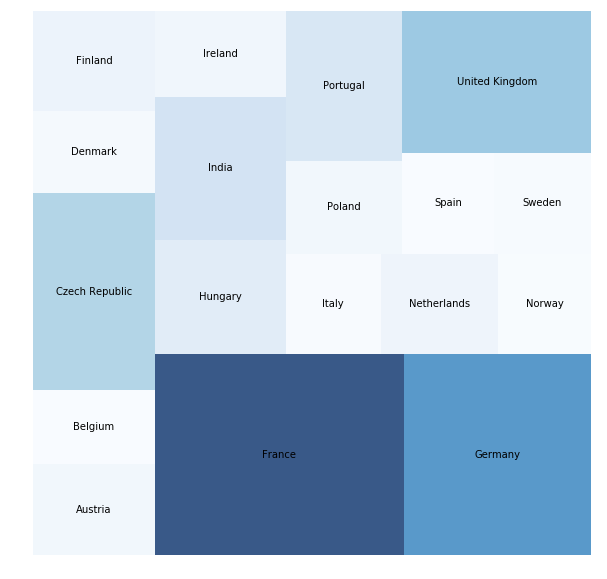

In [15]:
df_EA=df[df['Region'].isin(['Europe', 'Asia'])].copy()
# Create new column RSale, which is = Quantity * UnitPrice
df_EA['RSale']= df_EA.Quantity * df_EA.UnitPrice
#adding new column called Sale Percentage to the dataset
Rsum = df_EA.RSale.sum()
df_EA['Sale percentage'] = df_EA.RSale/Rsum *100
# finding all the sales for different coumntry by groupby
df_m = df_EA.groupby(['Country', 'Region']).sum()
df_m['Country'] = df_m.index.get_level_values('Country')
df_m['Region'] = df_m.index.get_level_values('Region')
df_m.reset_index(drop = True, inplace = True)
#perpare data for treemap polt
data = pd.DataFrame({'Country': df_m.Country, 
                     'Region': df_m.Region,
                     'RSale': df_m.RSale,
                         'Sale percentage': df_m['Sale percentage']})
# create a color palette, mapped to these values
cmap = matplotlib.cm.Blues
mini=min(data['Sale percentage'])
maxi=max(data['Sale percentage'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in data['Sale percentage']]
 
# Change color
squarify.plot(sizes=data['Sale percentage'], label = data['Country'], alpha=.8, color=colors )
plt.axis('off')
plt.show()

## 4.Line Chart

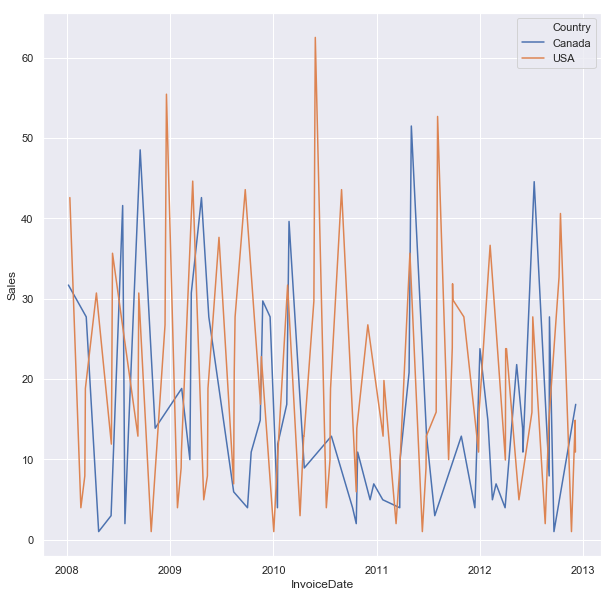

In [16]:
#Choosing data for USA and Canada
df_UC=df[df['Country'].isin(['USA', 'Canada'])].copy()
# format date
df_UC['InvoiceDate'] = pd.to_datetime(df_UC['InvoiceDate'])
# calculate total sales for each day
df_UC_p = df_UC.groupby(['Country', 'InvoiceDate']).sum()
df_UC_p['InvoiceDate'] = df_UC_p.index.get_level_values('InvoiceDate')
df_UC_p['Country'] = df_UC_p.index.get_level_values('Country')
df_UC_p.reset_index(drop = True, inplace = True)
#sort date
df_UC_p = df_UC_p.sort_values(by = ['InvoiceDate'])
#ploting
sns.set(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="InvoiceDate", y="Sales",
             hue="Country",
             data=df_UC_p)
sns.set(rc={'figure.figsize':(11,8)})

## 5.Boxplot

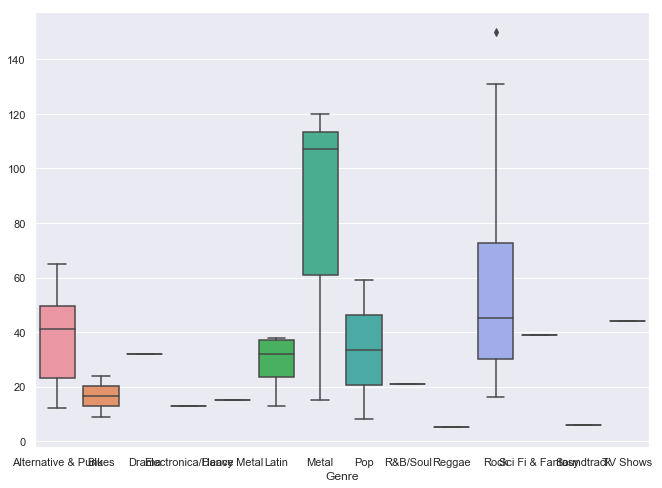

In [19]:
# Boxplot
sns.boxplot(data=df_top20)

## 6.Violinplot

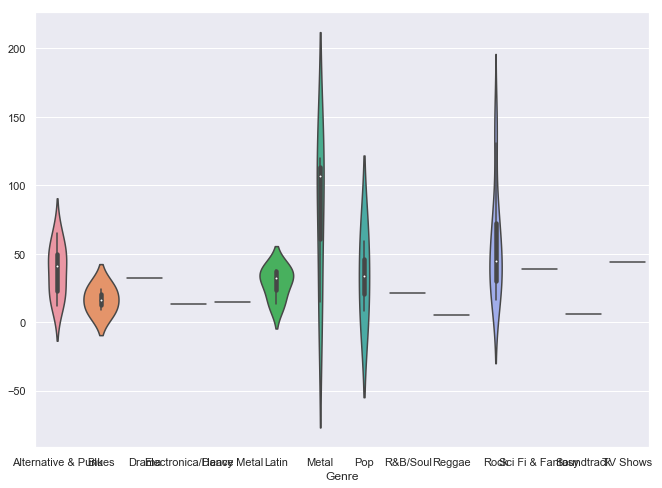

In [20]:
# Violin plot
sns.violinplot(data=df_top20)

## 7.Histogram

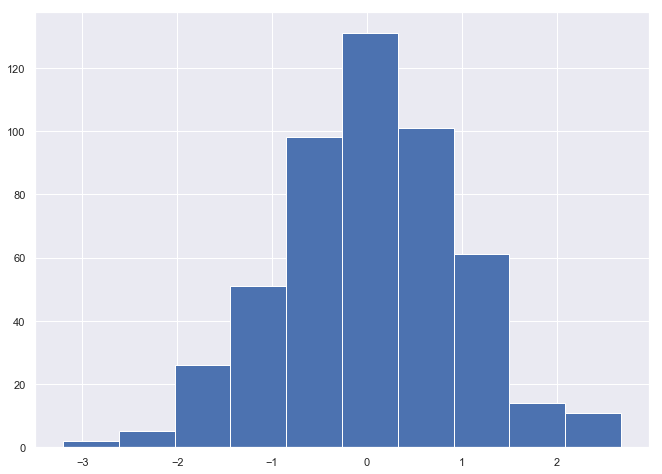

In [22]:
np.random.seed(10)
x = np.random.randn(500)
plt.hist(x);

## 8.Heatmap

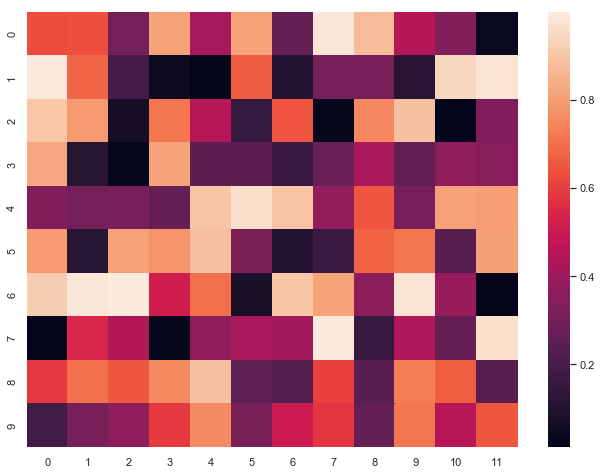

In [26]:
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

## 9. Pairplot

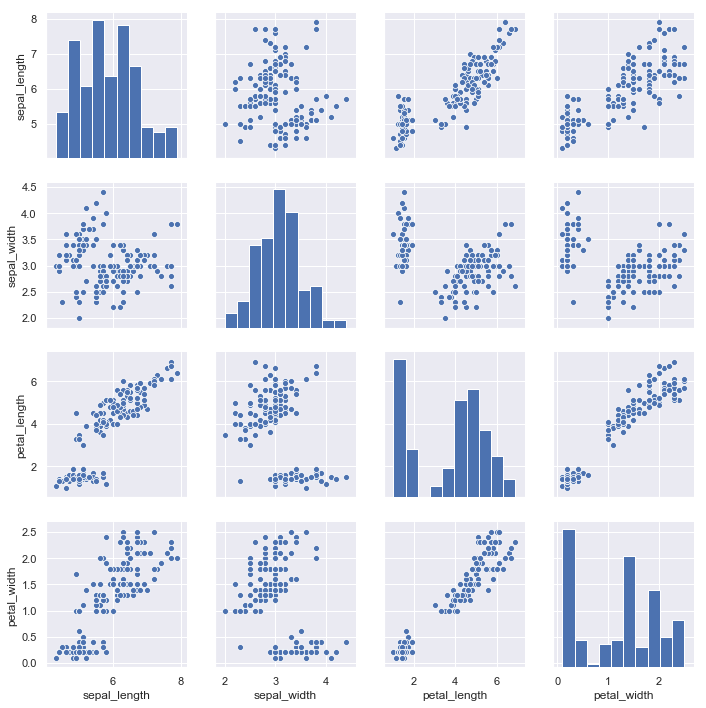

In [28]:
iris = sns.load_dataset("iris")
g = sns.pairplot(iris)

## 10.Jointplot

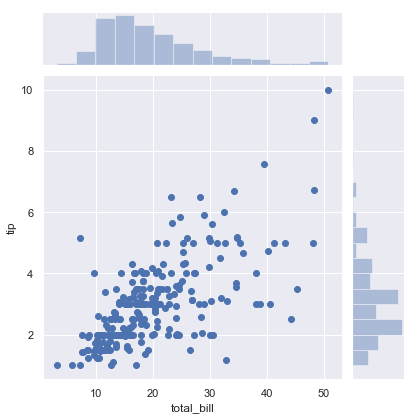

In [29]:
tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips)

## 11.Countplot

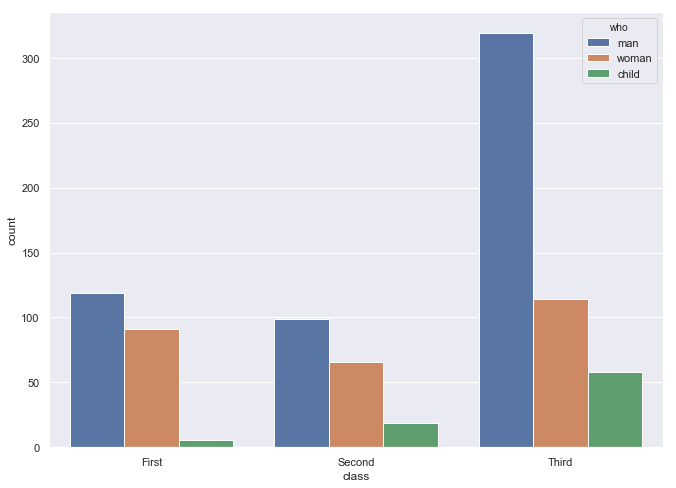

In [30]:
titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="class", hue="who", data=titanic)